In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15,12)})
import time

In [2]:
url='https://raw.githubusercontent.com/DataScience75/Batch-59-Datasets/main/Uber_raw_2019.csv'

In [3]:
data=pd.read_csv(url)
data.head()

,Date/Time,Lat,Lon,Base
0,09-01-2019 00:01,40.2201,-74.0021,B02512
1,09-01-2019 00:01,40.7500,-74.0027,B02512
2,09-01-2019 00:03,40.7559,-73.9864,B02512
3,09-01-2019 00:06,40.7450,-73.9889,B02512
4,09-01-2019 00:11,40.8145,-73.9444,B02512


In [4]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [5]:
data.shape

(409565, 4)

In [6]:
## which day has highest and lowest trips
## what is the busiest hour peak the prices

In [7]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])

In [8]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime) ##little faster

In [9]:
##extract day,week day hour

In [10]:
data

,Date/Time,Lat,Lon,Base
0,2019-09-01 00:01:00,40.2201,-74.0021,B02512
1,2019-09-01 00:01:00,40.7500,-74.0027,B02512
2,2019-09-01 00:03:00,40.7559,-73.9864,B02512
3,2019-09-01 00:06:00,40.7450,-73.9889,B02512
4,2019-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
409560,2019-09-12 23:59:00,40.7558,-73.9172,B02764
409561,2019-09-12 23:59:00,40.7487,-73.9930,B02764
409562,2019-09-12 23:59:00,40.7253,-73.9955,B02764
409563,2019-09-12 23:59:00,40.7228,-73.9853,B02764


In [11]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [12]:
start=time.time()
data['Date/Time']=pd.to_datetime(data['Date/Time'])
end=time.time()
print('The time taken is ',(end-start))

The time taken is  0.012121200561523438


In [13]:
start=time.time()
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)
end=time.time()
print('The total time taken is ',(end-start))

The total time taken is  0.9075722694396973


In [14]:
##extract day,week day hour

In [15]:
start=time.time()
data['day']=data['Date/Time'].dt.day
data['WeekDay']=data['Date/Time'].dt.weekday
data['Hour']=data['Date/Time'].dt.hour
end=time.time()
print('The total time taken is ',(end-start))

The total time taken is  0.11762738227844238


In [16]:
start=time.time()
data['day']=data['Date/Time'].apply(lambda x:x.day)
data['WeekDay']=data['Date/Time'].apply(lambda x:x.weekday())
data['Hour']=data['Date/Time'].apply(lambda x:x.hour)
end=time.time()
print('The total time taken is ',(end-start))

The total time taken is  2.3687310218811035


In [17]:
data

,Date/Time,Lat,Lon,Base,day,WeekDay,Hour
0,2019-09-01 00:01:00,40.2201,-74.0021,B02512,1,6,0
1,2019-09-01 00:01:00,40.7500,-74.0027,B02512,1,6,0
2,2019-09-01 00:03:00,40.7559,-73.9864,B02512,1,6,0
3,2019-09-01 00:06:00,40.7450,-73.9889,B02512,1,6,0
4,2019-09-01 00:11:00,40.8145,-73.9444,B02512,1,6,0
...,...,...,...,...,...,...,...
409560,2019-09-12 23:59:00,40.7558,-73.9172,B02764,12,3,23
409561,2019-09-12 23:59:00,40.7487,-73.9930,B02764,12,3,23
409562,2019-09-12 23:59:00,40.7253,-73.9955,B02764,12,3,23
409563,2019-09-12 23:59:00,40.7228,-73.9853,B02764,12,3,23


In [18]:
data.head()

,Date/Time,Lat,Lon,Base,day,WeekDay,Hour
0,2019-09-01 00:01:00,40.2201,-74.0021,B02512,1,6,0
1,2019-09-01 00:01:00,40.7500,-74.0027,B02512,1,6,0
2,2019-09-01 00:03:00,40.7559,-73.9864,B02512,1,6,0
3,2019-09-01 00:06:00,40.7450,-73.9889,B02512,1,6,0
4,2019-09-01 00:11:00,40.8145,-73.9444,B02512,1,6,0


In [19]:
## this data is for only Septmeber month - day and hour

<Figure size 864x720 with 0 Axes>

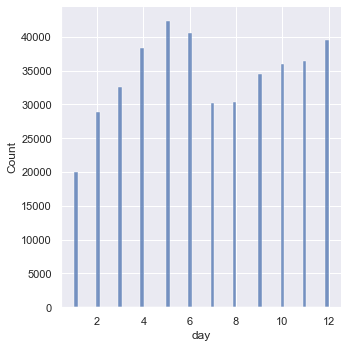

In [20]:
plt.figure(figsize=(12,10))
sns.displot(x=data['day'])

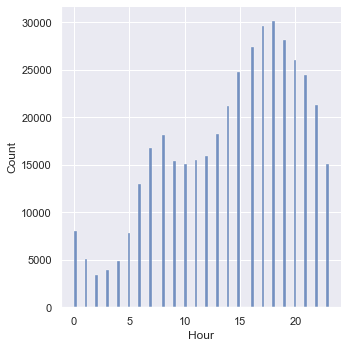

In [21]:
sns.displot(x=data['Hour'])

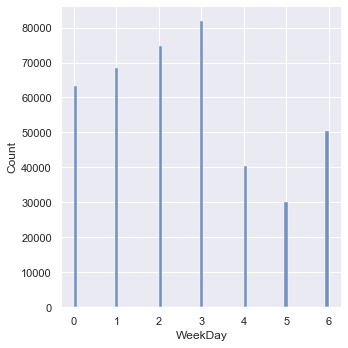

In [22]:
sns.displot(x=data['WeekDay'])

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

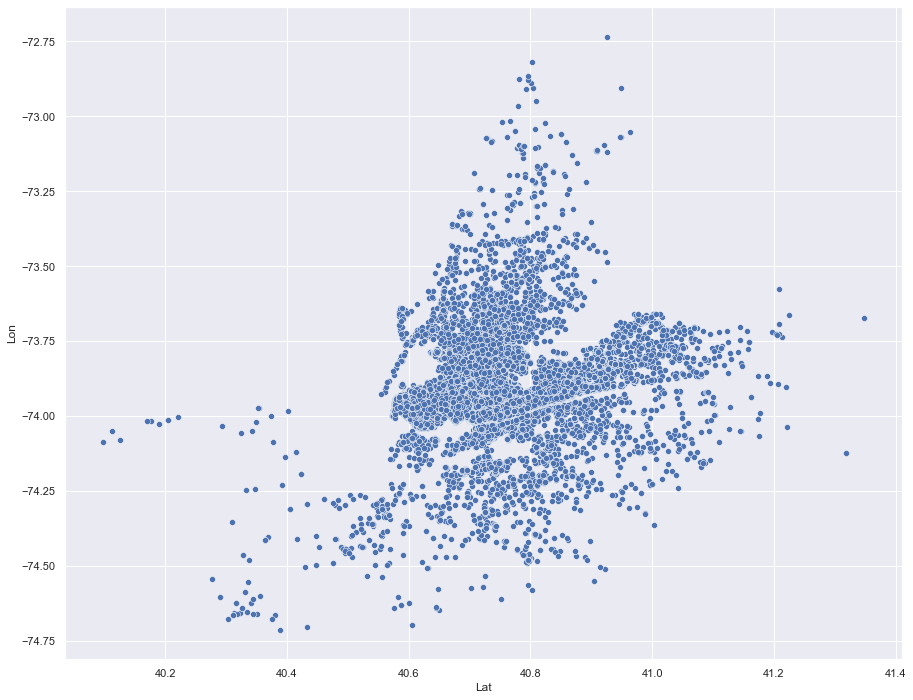

In [23]:
sns.scatterplot(x='Lat',y='Lon',data=data)

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

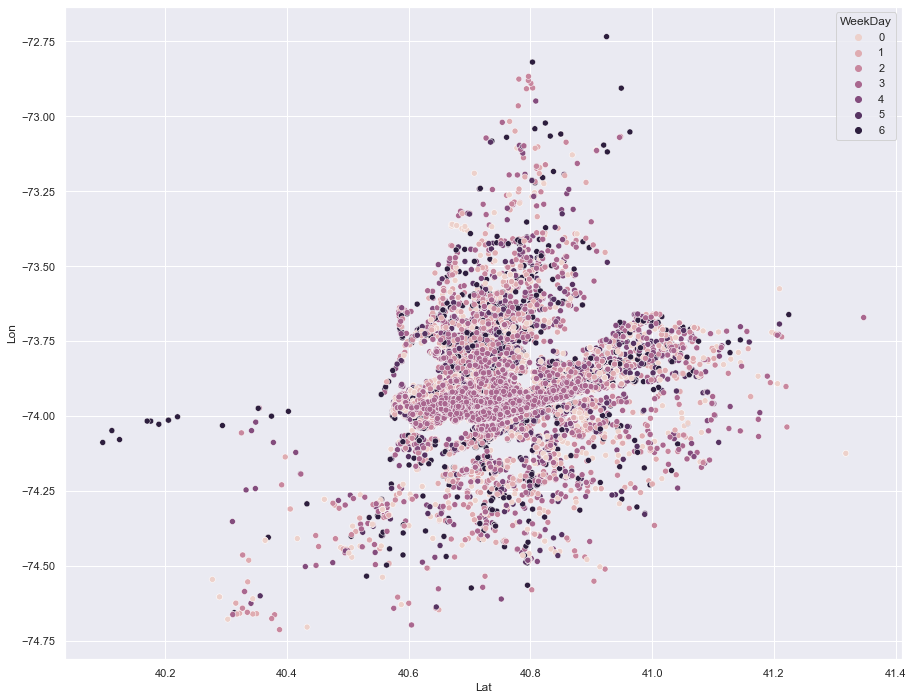

In [24]:
sns.scatterplot(x='Lat',y='Lon',data=data,hue='WeekDay')

In [25]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [26]:
data.groupby(['WeekDay','Hour']).size()

WeekDay  Hour
0        0        521
         1        305
         2        230
         3        535
         4        925
                 ... 
6        19      3222
         20      3004
         21      2542
         22      1935
         23      1098
Length: 168, dtype: int64

In [27]:
a=data.groupby(['WeekDay','Hour']).size().reset_index()

In [28]:
a.rename(columns={0:'Trips'},inplace=True)

In [29]:
a.corr()

,WeekDay,Hour,Trips
WeekDay,1.000000e+00,-3.054975e-18,-0.295255
Hour,-3.054975e-18,1.000000e+00,0.647632
Trips,-2.952554e-01,6.476319e-01,1.000000


<AxesSubplot:>

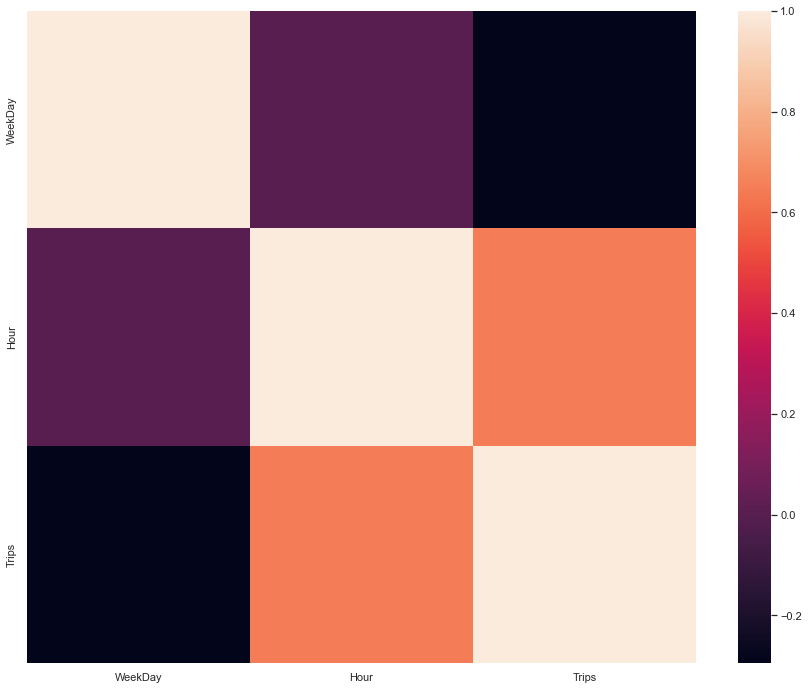

In [30]:
sns.heatmap(a.corr())

<AxesSubplot:>

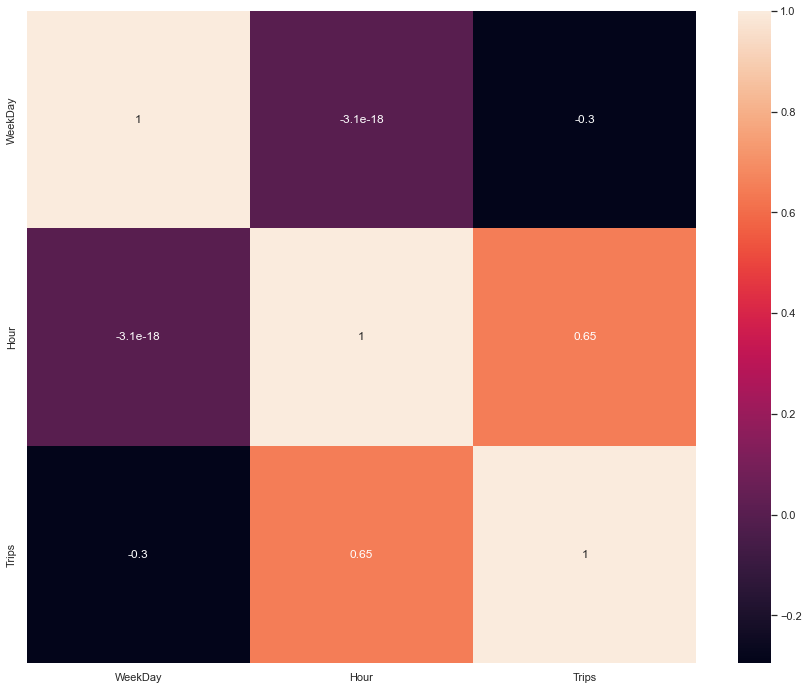

In [31]:
sns.heatmap(a.corr(),annot=True)